## How to query electron execution status

Let us first define a workflow comprised of subtasks. Adding subtasks to workflows is discussed in greater detail in [How to add electrons to lattices](../orchestration/add_electron_to_lattice.ipynb).

In [1]:
import covalent as ct

import time

RESULTS_DIR = "/tmp/results/"

@ct.electron
def add(x, y):
    time.sleep(2)
    return x + y

@ct.electron
def multiply(x, y):
    return x * y

@ct.lattice(    
    results_dir=RESULTS_DIR
)
def workflow(x, y):
    res_1 = add(x=x, y=y)
    return multiply(x=res_1, y=y)

Then we visualize the plots (described in [How to visualize lattices](../orchestration/visualize_lattice.ipynb)) to find out the node ids for the electrons / subtasks. 

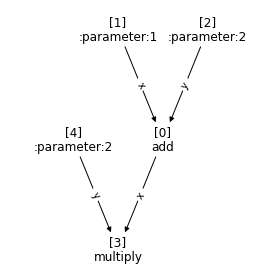

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

# It is important to include the parameter name and the value
workflow.draw(ax=ax, x=1, y=2)
plt.show()

Once the lattice has been constructed and dispatched (as shown below), we can query the status of individual subtask execution status using the node ids from the lattice visualization.

In [3]:
dispatch_id = ct.dispatch(workflow)(x=1, y=2)

.. tip:: Once workflows have been dispatched to the server and the dispatch ids are stored, the user can then query the results later using `ct.get_result`.

In [4]:
result = ct.get_result(dispatch_id=dispatch_id, results_dir=RESULTS_DIR, wait=False)
result.get_node_result(node_id=0)['status']

Status(STATUS='RUNNING')

Once we query the nodes being executed, we have access to the execution status via the `status` field which take the values `RUNNING` OR `COMPLETED`. 

.. tip: Retrieve result before querying individual node execution status.